In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### import datasets

In [2]:
train_full = pd.read_csv('./Data/train.csv')
test_full = pd.read_csv('./Data/test.csv')

In [3]:
test_full_Id = test_full['Id']

In [4]:
train_full.drop("Id", axis=1, inplace=True)
test_full.drop("Id", axis=1, inplace=True)

In [5]:
train_full.shape
test_full.shape

(1459, 79)

In [6]:
train_full.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [7]:
qual = train_full.select_dtypes(include=['object']).columns
print(f"Features Quali:\n {qual}")
quant = train_full.select_dtypes(include=['float64', 'int64']).columns
print(f"Features Quanti:\n {quant}")

Features Quali:
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Features Quanti:
 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfB

In [8]:
train_full_quant = train_full[quant]
train_full_quant.shape

(1460, 37)

In [9]:
print(f"Nombre de NAs dans train_full[quant]: \n {train_full_quant.isna().sum()}")

Nombre de NAs dans train_full[quant]: 
 MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64


In [10]:
train_full_quant = train_full_quant.fillna(0)

In [11]:
print(f"Nombre de NAs dans train_full[quant]: \n {train_full_quant.isna().sum()}")

Nombre de NAs dans train_full[quant]: 
 MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64


### Détection et suppresion des outliers

In [12]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples = 200, random_state = 42)
clf.fit(train_full_quant)
y_noano = clf.predict(train_full_quant)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

train_full_quant = train_full_quant.iloc[y_noano[y_noano['Top'] == 1].index.values]
train_full_quant.reset_index(drop = True, inplace = True)
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", train_full_quant.shape[0])

C:\Users\utilisateur\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\utilisateur\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


Number of Outliers: 146
Number of rows without outliers: 1314


C:\Users\utilisateur\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


### Comptage du nombre de features quantitatives et qualitatives

In [13]:
num_quant_train_full = len(train_full.select_dtypes(include=['int64','float64']).columns)
num_qual_train_full = len(train_full.select_dtypes(include=['object']).columns)

print(f"{num_quant_train_full} features numériques & {num_qual_train_full} features catégorielles")

37 features numériques & 43 features catégorielles


### Matrice de confustion (features quantitatives)

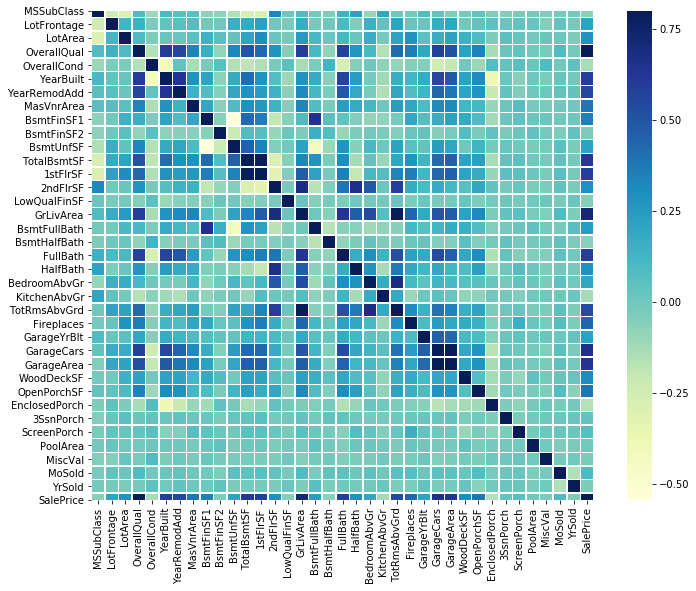

In [14]:
corrmat = train_full_quant.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, linewidths=.5, cmap="YlGnBu");

### Sélection des 10 plus grosses corrélations parmis les features quantitatives

In [15]:
cols = corrmat.nlargest(11,'SalePrice').index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', 'YearBuilt', 'FullBath', '1stFlrSF', 'YearRemodAdd',
       'TotRmsAbvGrd'],
      dtype='object')

### Matrice de confusion des 10 features quantitatives les plus corrélées

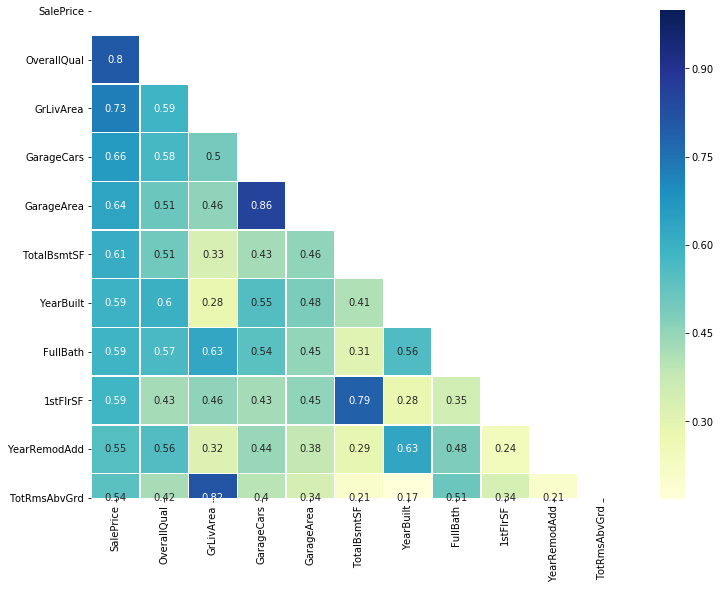

In [16]:
corrmat2 = train_full_quant[cols].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat2, vmax=1, square=True, linewidths=.5, cmap="YlGnBu", annot=True, mask=np.triu(corrmat2));

In [17]:
train_full_quant.drop(["TotRmsAbvGrd", "GarageCars", "TotalBsmtSF", "GarageYrBlt"], axis=1, inplace=True)

In [18]:
quant = train_full_quant.select_dtypes(include=['float64', 'int64']).columns

In [19]:
corrmat3 = train_full_quant.corr()
cols3 = corrmat3.nlargest(11,'SalePrice').index
cols3

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'YearBuilt',
       'FullBath', '1stFlrSF', 'YearRemodAdd', 'Fireplaces', 'MasVnrArea',
       'OpenPorchSF'],
      dtype='object')

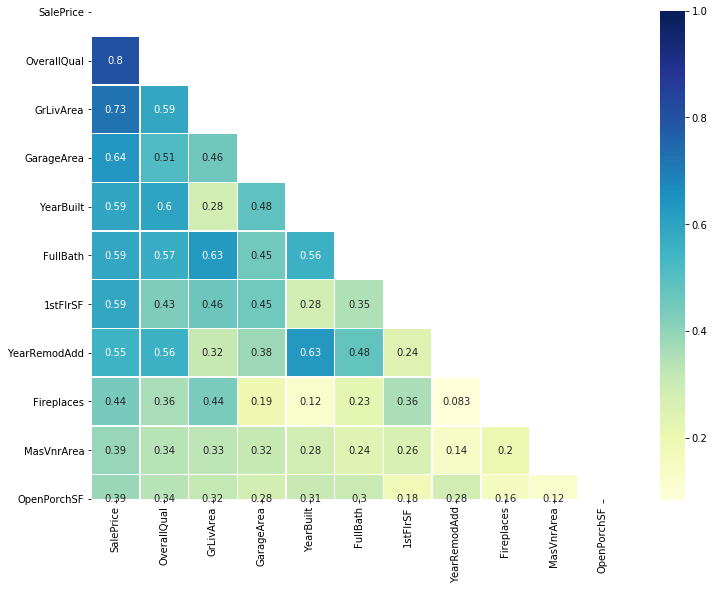

In [20]:
corrmat4 = train_full_quant[cols3].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat4, vmax=1, square=True, linewidths=.5, cmap="YlGnBu", annot=True, mask=np.triu(corrmat4));

### Affichage des correlations avec SalePrice des 10 features quantitatives les plus fortement corrélées

In [21]:
corrmat4['SalePrice']

SalePrice       1.000000
OverallQual     0.803117
GrLivArea       0.725020
GarageArea      0.635267
YearBuilt       0.593849
FullBath        0.589885
1stFlrSF        0.585174
YearRemodAdd    0.550722
Fireplaces      0.438582
MasVnrArea      0.389110
OpenPorchSF     0.385297
Name: SalePrice, dtype: float64

### Visualisation des data des 10 features quantitatives les plus fortement corrélées avec SalePrice

OverallQual / SalePrice

corr : 0.803


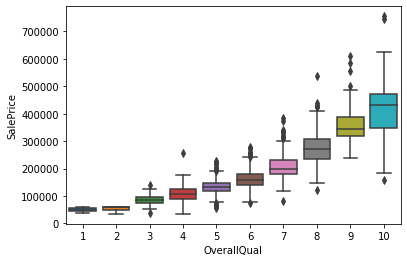

In [22]:
sns.boxplot(x='OverallQual', y='SalePrice', data=train_full)
print(f"corr : {round(train_full_quant['OverallQual'].corr(train_full_quant['SalePrice']),3)}")

Enlèvement des outliers de OverallQual

corr : 0.822


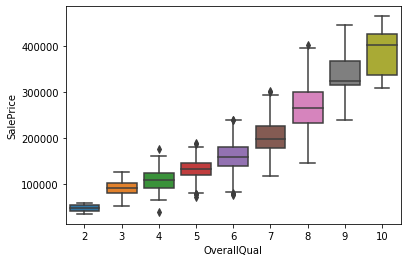

In [23]:
train_full_quant = train_full_quant.drop(train_full_quant[(train_full_quant['SalePrice']>700000)].index).reset_index(drop=True)

train_full_quant = train_full_quant.drop(train_full_quant[(train_full_quant['SalePrice']>405000)&(train_full_quant['OverallQual']==8)].index).reset_index(drop=True)
train_full_quant = train_full_quant.drop(train_full_quant[(train_full_quant['SalePrice']<130000)&(train_full_quant['OverallQual']==8)].index).reset_index(drop=True)

train_full_quant = train_full_quant.drop(train_full_quant[(train_full_quant['SalePrice']>480000)&(train_full_quant['OverallQual']==9)].index).reset_index(drop=True)

train_full_quant = train_full_quant.drop(train_full_quant[(train_full_quant['SalePrice']>305000)&(train_full_quant['OverallQual']==7)].index).reset_index(drop=True)
train_full_quant = train_full_quant.drop(train_full_quant[(train_full_quant['SalePrice']<100000)&(train_full_quant['OverallQual']==7)].index).reset_index(drop=True)

train_full_quant = train_full_quant.drop(train_full_quant[(train_full_quant['SalePrice']>240000)&(train_full_quant['OverallQual']==6)].index).reset_index(drop=True)

train_full_quant = train_full_quant.drop(train_full_quant[(train_full_quant['SalePrice']>190000)&(train_full_quant['OverallQual']==5)].index).reset_index(drop=True)
train_full_quant = train_full_quant.drop(train_full_quant[(train_full_quant['SalePrice']<70000)&(train_full_quant['OverallQual']==5)].index).reset_index(drop=True)

train_full_quant = train_full_quant.drop(train_full_quant[(train_full_quant['SalePrice']>130000)&(train_full_quant['OverallQual']==3)].index).reset_index(drop=True)
train_full_quant = train_full_quant.drop(train_full_quant[(train_full_quant['SalePrice']<50000)&(train_full_quant['OverallQual']==3)].index).reset_index(drop=True)


train_full_quant = train_full_quant.drop(train_full_quant[(train_full_quant['SalePrice']>200000)&(train_full_quant['OverallQual']==4)].index).reset_index(drop=True)
sns.boxplot(x='OverallQual',y='SalePrice', data=train_full_quant)
print(f"corr : {round(train_full_quant['OverallQual'].corr(train_full_quant['SalePrice']),3)}")


GrLivArea / SalePrice

corr : 0.716


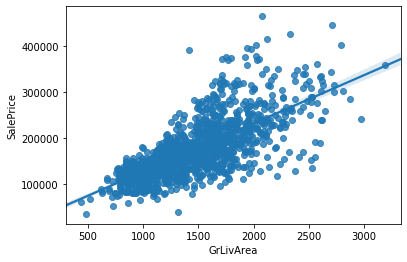

In [24]:
sns.regplot(x='GrLivArea',y='SalePrice', data=train_full_quant)
print(f"corr : {round(train_full_quant['GrLivArea'].corr(train_full_quant['SalePrice']),3)}")

GarageArea / SalePrice

corr : 0.632


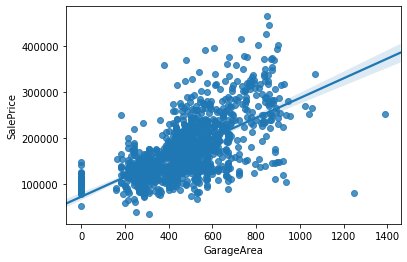

In [25]:
sns.regplot(x='GarageArea',y='SalePrice', data=train_full_quant)
print(f"corr : {round(train_full_quant['GarageArea'].corr(train_full_quant['SalePrice']),3)}")

YearBuilt / SalePrice

corr : 0.598


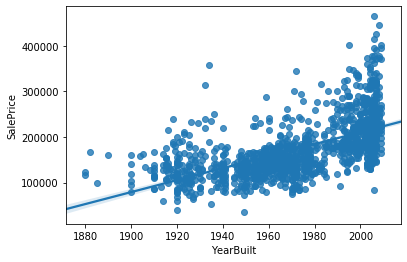

In [26]:
sns.regplot(x='YearBuilt',y='SalePrice', data=train_full_quant)
print(f"corr : {round(train_full_quant['YearBuilt'].corr(train_full_quant['SalePrice']),3)}")

1stFlrSF / SalePrice

corr : 0.587


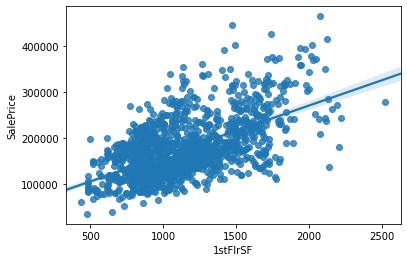

In [27]:
sns.regplot(x='1stFlrSF',y='SalePrice', data=train_full_quant)
print(f"corr : {round(train_full_quant['1stFlrSF'].corr(train_full_quant['SalePrice']),3)}")

FullBath / SalePrice

corr : 0.588


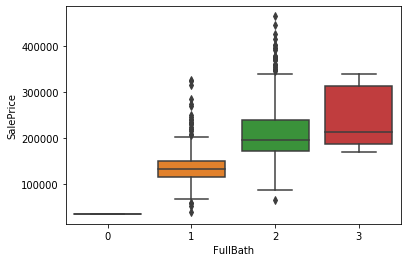

In [28]:
sns.boxplot(x='FullBath',y='SalePrice', data=train_full_quant)
print(f"corr : {round(train_full_quant['FullBath'].corr(train_full_quant['SalePrice']),3)}")

YearRemodAdd / SalePrice

corr : 0.545


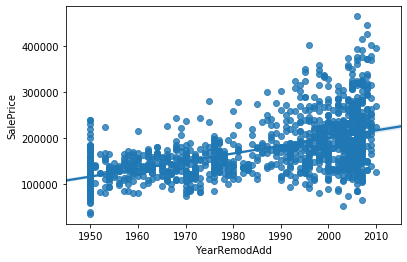

In [29]:
sns.regplot(x='YearRemodAdd',y='SalePrice', data=train_full_quant)
print(f"corr : {round(train_full_quant['YearRemodAdd'].corr(train_full_quant['SalePrice']),3)}")

Fireplaces / SalePrice

corr : 0.437


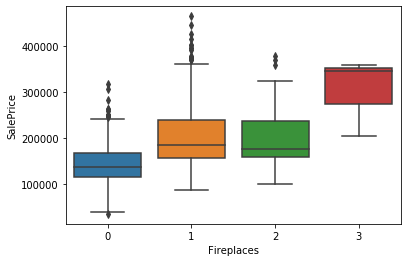

In [30]:
sns.boxplot(x='Fireplaces',y='SalePrice', data=train_full_quant)
print(f"corr : {round(train_full_quant['Fireplaces'].corr(train_full_quant['SalePrice']),3)}")

MasVnrArea / SalePrice

corr : 0.38


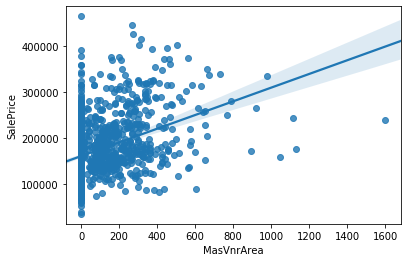

In [31]:
sns.regplot(x='MasVnrArea',y='SalePrice', data=train_full_quant)
print(f"corr : {round(train_full_quant['MasVnrArea'].corr(train_full_quant['SalePrice']),3)}")

OpenPorchSF / SalePrice

corr : 0.376


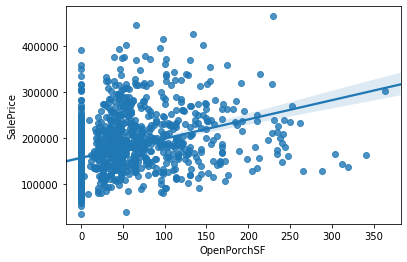

In [32]:
sns.regplot(x='OpenPorchSF',y='SalePrice', data=train_full_quant)
print(f"corr : {round(train_full_quant['OpenPorchSF'].corr(train_full_quant['SalePrice']),3)}")

In [33]:
corrmat3 = train_full_quant[cols3].corr()
corrmat3['SalePrice']

SalePrice       1.000000
OverallQual     0.822381
GrLivArea       0.716049
GarageArea      0.632117
YearBuilt       0.598047
FullBath        0.587783
1stFlrSF        0.587027
YearRemodAdd    0.545475
Fireplaces      0.436762
MasVnrArea      0.379798
OpenPorchSF     0.376041
Name: SalePrice, dtype: float64

In [34]:
print(f"Nombre de NAs dans train_full_quant: \n {train_full_quant.isna().sum()}")

Nombre de NAs dans train_full_quant: 
 MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
Fireplaces       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64


In [35]:
train_full_quant = train_full_quant[cols3]

### Split du train_full_quant en train et val

In [36]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 42
random.seed(SEED)
train, val= train_test_split(train_full_quant, test_size=0.3)

print("Train full shape: " + str(train_full_quant.shape))
print("Train shape: " + str(train.shape))
print("Val shape: " + str(val.shape))

Train full shape: (1284, 11)
Train shape: (898, 11)
Val shape: (386, 11)


### Séparation de X_train et Y_train sur train et val

In [37]:
target_column = 'SalePrice'
Y_train = train[target_column].values
X_train = train.drop(target_column, axis=1).values
X_val = val.drop(target_column, axis=1).values
Y_val = val[target_column].values

### Normalisation X

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
print(X_train_scaled.shape)

(898, 10)


### Transfo SalePrice en log

In [39]:
Y_train = np.log1p(Y_train)
Y_val = np.log1p(Y_val)

### Normalisation Y

In [40]:
Y_train_reshaped = np.reshape(Y_train, (Y_train.shape[0], 1))
print(Y_train_reshaped.shape)
Y_val_reshaped = np.reshape(Y_val, (Y_val.shape[0], 1))
print(Y_val_reshaped.shape)

(898, 1)
(386, 1)


In [41]:
scaler2 = StandardScaler()
scaler2.fit(Y_train_reshaped)

Y_train_scaled = scaler2.transform(Y_train_reshaped)
Y_val_scaled = scaler2.transform(Y_val_reshaped)

### Création modèle Sequential

In [42]:
from tensorflow.keras.models import Sequential

model = Sequential()

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-42-ea80743cf695>", line 1, in <module>
    from tensorflow.keras.models import Sequential
  File "C:\Users\utilisateur\Anaconda3\lib\site-packages\tensorflow\__init__.py", line 98, in <module>
    from tensorflow_core import *
  File "C:\Users\utilisateur\Anaconda3\lib\site-packages\tensorflow_core\__init__.py", line 40, in <module>
    from tensorflow.python.tools import module_util as _module_util
ModuleNotFoundError: No module named 'tensorflow.python.tools'; 'tensorflow.python' is not a package

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\utilisateur\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py", line 2040, in showtraceback
    stb 

ModuleNotFoundError: No module named 'tensorflow.python.tools'; 'tensorflow.python' is not a package

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

model.add(Input(shape=X_train_scaled.shape[1]))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))
loss = 'mse'
LEARNING_RATE = 0.001
model.compile(loss=loss, optimizer=SGD(lr=LEARNING_RATE))
BATCH_SIZE = X_train_scaled.shape[0]
EPOCHS = 1000
history = model.fit(X_train_scaled, Y_train_scaled, epochs=EPOCHS, batch_size=BATCH_SIZE)

In [ ]:
model.summary()

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

### Prédiction sur X_val

In [ ]:
predict = model.predict(X_val_scaled)

### Calcul de l'erreur sur la prédiction (MSE)

In [ ]:
from sklearn.metrics import mean_squared_error

mse_krm=mean_squared_error(Y_val_scaled, predict)
print(mse_krm)

In [ ]:
rmse = np.sqrt(mse_krm)
rmse

### Reconversion du SalePrice

In [ ]:
predict = scaler2.inverse_transform(predict)
predict  = np.e**predict

### Choix des colonne sur le test_full

In [ ]:
cols3 = cols3.drop("SalePrice")
test = test_full[cols3]

In [ ]:
test

### Transfo du test

In [ ]:
test = test.fillna(0)

In [ ]:
test.isna().sum()

In [ ]:
test_scaled = scaler.transform(test)

### Prédictions sur le test

In [ ]:
predict_test = model.predict(test_scaled)

In [ ]:
predict_test

### Reconversion prédiction et soumission Kaggle

In [ ]:
predict_test = scaler2.inverse_transform(predict_test)
predict_test  = np.e**predict_test

In [ ]:
from pandas import DataFrame
df = DataFrame(data=predict_test, index=test_full_Id)
df = df.astype('int64')
df


In [ ]:
df.columns = ['SalePrice']
#df = df.rename(columns={"":"SalePrice"})
df

In [ ]:
df.to_csv('prediction.csv')

Avec XGBoost

In [ ]:
from xgboost import XGBRegressor

model2 = XGBRegressor()

In [ ]:
model2.fit(X_train_scaled, Y_train_scaled)

In [ ]:
prediction_boost = model2.predict(X_val_scaled)

In [ ]:
prediction_boost_test = model2.predict(test_scaled)

In [ ]:
prediction_boost_test = scaler2.inverse_transform(prediction_boost_test)
prediction_boost_test  = np.e**prediction_boost_test

In [ ]:
df2 = DataFrame(data=prediction_boost_test, index=test_full_Id)
df2 = df2.astype('int64')
df2.columns = ['SalePrice']
df2

In [ ]:
df2.to_csv('prediction_boost.csv')